In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [385]:
#Read the file
df=pd.read_csv("sales.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [386]:
#1000 rows & 14 columns
#There are no null values in the data
#datatypes of col: int64(2), object(7), float(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [387]:
# +ve skewed: Unit Price, Unit Cost, Total Cost, Total Profit
# -ve skewed: Order ID, Units Sold, Total Revenue 
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


In [388]:
#Read the upper rows of the data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [389]:
#Read any random row
df.sample()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
691,Asia,South Korea,Snacks,Online,L,05-08-2015,763568961,06-07-2015,5879,152.58,97.44,897017.82,572849.76,324168.06


In [390]:
#Read lower rows
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73
999,Europe,Portugal,Cereal,Offline,C,04-10-2014,811546599,05-08-2014,3528,205.70,117.11,725709.60,413164.08,312545.52


In [391]:
# Read the column
df["Units Sold"]

0      8446
1      3018
2      1517
3      3322
4      9845
       ... 
995    6524
996     288
997    9556
998    9801
999    3528
Name: Units Sold, Length: 1000, dtype: int64

In [392]:
df["Unit Price"]

0      437.20
1      154.06
2      255.28
3      205.70
4        9.33
        ...  
995    152.58
996    255.28
997    154.06
998    668.27
999    205.70
Name: Unit Price, Length: 1000, dtype: float64

In [393]:
df["Unit Cost"]

0      263.33
1       90.93
2      159.42
3      117.11
4        6.92
        ...  
995     97.44
996    159.42
997     90.93
998    502.54
999    117.11
Name: Unit Cost, Length: 1000, dtype: float64

In [394]:
df["Total Revenue"]

0      3692591.20
1       464953.08
2       387259.76
3       683335.40
4        91853.85
          ...    
995     995431.92
996      73520.64
997    1472197.36
998    6549714.27
999     725709.60
Name: Total Revenue, Length: 1000, dtype: float64

In [395]:
# Calculate mean
df["Units Sold"].mean()

5053.988

In [396]:
# Calculate median
df["Units Sold"].median()

5184.0

In [397]:
df["Unit Price"].mean()

262.1068400000004

In [398]:
df["Unit Price"].median()

154.06

In [399]:
df["Unit Cost"].mean()

184.96510999999992

In [400]:
df["Unit Cost"].median()

97.44

In [401]:
df["Total Revenue"].mean()

1327321.8403300012

In [402]:
df["Total Revenue"].median()

754939.1799999999

In [403]:
df["Total Profit"].mean()

391202.6115600001

In [404]:
df["Total Profit"].median()

277225.98

In [405]:
df["Total Profit"].mean()

391202.6115600001

In [406]:
df["Total Profit"].median()

277225.98

In [407]:
# Reading 3 columns together
df[["Unit Cost","Unit Price","Units Sold"]]

,Unit Cost,Unit Price,Units Sold
0,263.33,437.20,8446
1,90.93,154.06,3018
2,159.42,255.28,1517
3,117.11,205.70,3322
4,6.92,9.33,9845
...,...,...,...
995,97.44,152.58,6524
996,159.42,255.28,288
997,90.93,154.06,9556
998,502.54,668.27,9801


In [408]:
# Reading 3 columns together
df[["Total Cost","Total Revenue","Total Profit"]]

,Total Cost,Total Revenue,Total Profit
0,2224085.18,3692591.20,1468506.02
1,274426.74,464953.08,190526.34
2,241840.14,387259.76,145419.62
3,389039.42,683335.40,294295.98
4,68127.40,91853.85,23726.45
...,...,...,...
995,635698.56,995431.92,359733.36
996,45912.96,73520.64,27607.68
997,868927.08,1472197.36,603270.28
998,4925394.54,6549714.27,1624319.73


In [409]:
# 1000 rows & 14 columns
df.shape

(1000, 14)

In [410]:
# Data Types of colms (int64(2), object(7), float(5))
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [411]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [412]:
# Canada using loc (label)
df.loc[1,"Country"]

'Canada'

In [413]:
# Fruits using loc (label)
df.loc[4,"Item Type"]

'Fruits'

In [414]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73
999,Europe,Portugal,Cereal,Offline,C,04-10-2014,811546599,05-08-2014,3528,205.70,117.11,725709.60,413164.08,312545.52


In [415]:
# Vegetables & Household together
df.loc[997:998,"Item Type"]

997    Vegetables
998     Household
Name: Item Type, dtype: object

In [416]:
df.loc[996,"Total Revenue"]

73520.64

In [417]:
# iloc value at index level
df.iloc[0]    

Region            Middle East and North Africa
Country                                  Libya
Item Type                            Cosmetics
Sales Channel                          Offline
Order Priority                               M
Order Date                          10/18/2014
Order ID                             686800706
Ship Date                           10/31/2014
Units Sold                                8446
Unit Price                               437.2
Unit Cost                               263.33
Total Revenue                        3692591.2
Total Cost                          2224085.18
Total Profit                        1468506.02
Name: 0, dtype: object

In [418]:
df.iloc[3,2]

'Cereal'

In [419]:
df.iloc[1:4]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98


In [420]:
# vegetables and household
df.iloc[997:999,2]

997    Vegetables
998     Household
Name: Item Type, dtype: object

In [421]:
# Profit 
df.iloc[1:4,13]

1    190526.34
2    145419.62
3    294295.98
Name: Total Profit, dtype: float64

In [422]:
# # Unique values in whole column
df["Sales Channel"].unique()

array(['Offline', 'Online'], dtype=object)

In [423]:
df["Order Priority"].unique()

array(['M', 'C', 'H', 'L'], dtype=object)

In [424]:
# Counts of unique values in column
df["Sales Channel"].value_counts()

Offline    520
Online     480
Name: Sales Channel, dtype: int64

In [425]:
df["Order Priority"].value_counts()

L    268
C    262
M    242
H    228
Name: Order Priority, dtype: int64

In [426]:
df["Item Type"].value_counts()

Beverages          101
Vegetables          97
Office Supplies     89
Baby Food           87
Personal Care       87
Snacks              82
Cereal              79
Clothes             78
Meat                78
Household           77
Cosmetics           75
Fruits              70
Name: Item Type, dtype: int64

In [427]:
# Mean
df["Order Priority"].value_counts().mean()

250.0

In [428]:
df["Item Type"].value_counts().mean()

83.33333333333333

In [429]:
df["Sales Channel"].value_counts().mean()

500.0

In [430]:
# What is the average Revenue of canada?
df[df["Country"]=="Canada"]["Total Revenue"].mean()

408701.0999999999

In [431]:
# What is the average Revenue of diff countries?
df.groupby("Country")["Total Revenue"].mean()

Country
Afghanistan     4.739315e+05
Albania         1.213737e+06
Algeria         2.054518e+06
Andorra         1.021875e+06
Angola          1.955379e+06
                    ...     
Vatican City    3.938448e+05
Vietnam         1.666862e+06
Yemen           1.968911e+06
Zambia          9.770581e+05
Zimbabwe        6.928978e+05
Name: Total Revenue, Length: 185, dtype: float64

In [432]:
# What is the average Profit of diff countries?
df.groupby("Country")["Total Profit"].mean()

Country
Afghanistan     227567.850000
Albania         392883.542500
Algeria         447197.848000
Andorra         306181.267143
Angola          567643.052500
                    ...      
Vatican City    162570.662500
Vietnam         495167.371429
Yemen           612942.638333
Zambia          364967.600000
Zimbabwe        154357.291000
Name: Total Profit, Length: 185, dtype: float64

In [433]:
# wht is the average profit of available items
df.groupby("Item Type")["Total Profit"].mean()

Item Type
Baby Food          481082.775632
Beverages           78285.270297
Cereal             434818.783671
Clothes            355888.356923
Cosmetics          987748.515200
Fruits              12226.446429
Household          798500.054026
Meat               299137.666667
Office Supplies    630515.196629
Personal Care      137030.384368
Snacks             265710.245854
Vegetables         306718.081237
Name: Total Profit, dtype: float64

In [434]:
df.groupby("Unit Price")["Total Revenue"].mean()

Unit Price
9.33      4.733309e+04
47.45     2.372054e+05
81.73     4.469072e+05
109.28    5.295681e+05
152.58    7.352570e+05
154.06    7.485029e+05
205.70    1.009620e+06
255.28    1.281148e+06
421.89    2.206349e+06
437.20    2.483716e+06
651.21    3.252260e+06
668.27    3.219777e+06
Name: Total Revenue, dtype: float64

In [435]:
# count of region
df["Region"].value_counts()

Europe                               267
Sub-Saharan Africa                   262
Middle East and North Africa         138
Asia                                 136
Central America and the Caribbean     99
Australia and Oceania                 79
North America                         19
Name: Region, dtype: int64

<AxesSubplot:xlabel='Item Type'>

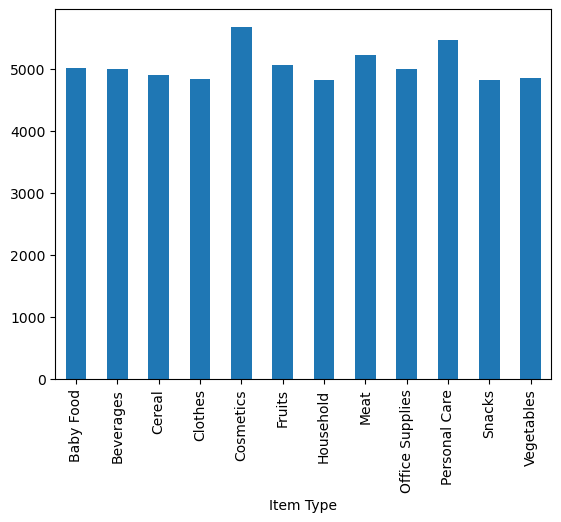

In [436]:
df.groupby("Item Type")["Units Sold"].mean().plot(kind='bar')

<AxesSubplot:xlabel='Item Type'>

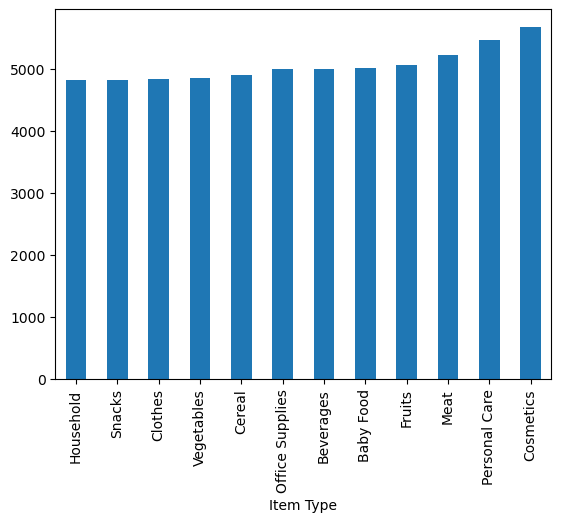

In [437]:
#Sort value by default gives ascending order
df.groupby("Item Type")["Units Sold"].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Item Type'>

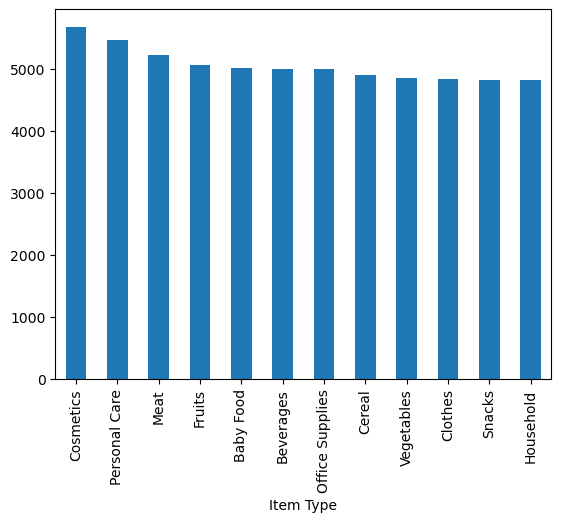

In [438]:
#Descending Order
df.groupby("Item Type")["Units Sold"].mean().sort_values(ascending=False).plot(kind='bar')

In [439]:
df.sort_values("Units Sold")

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
590,Sub-Saharan Africa,Seychelles,Household,Online,C,9/28/2013,109694898,10/16/2013,13,668.27,502.54,8687.51,6533.02,2154.49
747,Sub-Saharan Africa,Cape Verde,Personal Care,Offline,L,7/19/2016,458942115,7/29/2016,25,81.73,56.67,2043.25,1416.75,626.50
865,Europe,France,Office Supplies,Offline,H,5/29/2016,459212481,6/16/2016,33,651.21,524.96,21489.93,17323.68,4166.25
609,Sub-Saharan Africa,Rwanda,Meat,Offline,C,8/21/2013,884493243,10-02-2013,61,421.89,364.69,25735.29,22246.09,3489.20
282,Middle East and North Africa,Libya,Vegetables,Online,C,01-02-2015,276225316,02-09-2015,64,154.06,90.93,9859.84,5819.52,4040.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,Europe,Andorra,Personal Care,Online,M,5/21/2017,692956054,6/23/2017,9950,81.73,56.67,813213.50,563866.50,249347.00
146,Europe,Serbia,Snacks,Offline,C,9/20/2013,547748982,10/14/2013,9951,152.58,97.44,1518323.58,969625.44,548698.14
345,Europe,Luxembourg,Baby Food,Offline,H,6/30/2011,393620669,08-02-2011,9958,255.28,159.42,2542078.24,1587504.36,954573.88
817,Australia and Oceania,New Zealand,Meat,Offline,H,06-02-2013,969616687,6/28/2013,9980,421.89,364.69,4210462.20,3639606.20,570856.00


<AxesSubplot:xlabel='Sales Channel'>

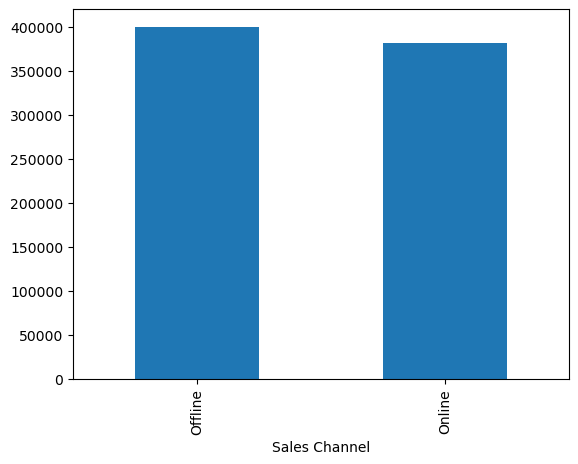

In [440]:
# Which mode makes more profit
df.groupby("Sales Channel")['Total Profit'].mean().plot(kind='bar')

In [441]:
# Sort values in ascending form of unit cost
df.sort_values("Unit Cost")

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
499,Middle East and North Africa,Jordan,Fruits,Online,C,5/15/2017,521787345,6/25/2017,7325,9.33,6.92,68342.25,50689.00,17653.25
268,Sub-Saharan Africa,Liberia,Fruits,Online,M,10-08-2014,217140328,10/30/2014,5503,9.33,6.92,51342.99,38080.76,13262.23
794,Sub-Saharan Africa,Zambia,Fruits,Online,L,5/26/2015,360820043,07-02-2015,3524,9.33,6.92,32878.92,24386.08,8492.84
260,Central America and the Caribbean,El Salvador,Fruits,Online,C,11-06-2016,245042169,12/15/2016,2278,9.33,6.92,21253.74,15763.76,5489.98
814,Sub-Saharan Africa,Mozambique,Fruits,Online,C,12/14/2012,433228528,12/21/2012,804,9.33,6.92,7501.32,5563.68,1937.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Middle East and North Africa,Jordan,Office Supplies,Offline,M,10/22/2013,285509622,10/28/2013,7497,651.21,524.96,4882121.37,3935625.12,946496.25
768,Central America and the Caribbean,Cuba,Office Supplies,Online,C,12/22/2014,511349046,01-02-2015,8401,651.21,524.96,5470815.21,4410188.96,1060626.25
135,Europe,Poland,Office Supplies,Offline,M,04-09-2015,358099639,4/29/2015,8496,651.21,524.96,5532680.16,4460060.16,1072620.00
423,Europe,Albania,Office Supplies,Offline,M,8/31/2011,476436126,10/15/2011,6892,651.21,524.96,4488139.32,3618024.32,870115.00


In [442]:
df.sort_values("Item Type")

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
345,Europe,Luxembourg,Baby Food,Offline,H,6/30/2011,393620669,08-02-2011,9958,255.28,159.42,2542078.24,1587504.36,954573.88
90,Asia,Philippines,Baby Food,Online,L,2/23/2014,160127294,3/23/2014,4079,255.28,159.42,1041287.12,650274.18,391012.94
152,Europe,Estonia,Baby Food,Offline,C,01-01-2011,462085664,1/15/2011,271,255.28,159.42,69180.88,43202.82,25978.06
328,Central America and the Caribbean,Grenada,Baby Food,Online,M,6/23/2013,641018617,6/30/2013,508,255.28,159.42,129682.24,80985.36,48696.88
802,Europe,Albania,Baby Food,Online,L,12/23/2011,585823476,01-06-2012,7040,255.28,159.42,1797171.20,1122316.80,674854.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Europe,Spain,Vegetables,Online,L,10-08-2013,751940190,10-10-2013,4667,154.06,90.93,718998.02,424370.31,294627.71
821,Asia,Kyrgyzstan,Vegetables,Offline,H,1/29/2017,348286616,2/13/2017,4604,154.06,90.93,709292.24,418641.72,290650.52
827,Asia,Thailand,Vegetables,Online,L,7/17/2010,976871955,8/31/2010,6975,154.06,90.93,1074568.50,634236.75,440331.75
915,Europe,Slovakia,Vegetables,Online,M,3/23/2015,401116263,3/31/2015,8071,154.06,90.93,1243418.26,733896.03,509522.23


In [443]:
df.sort_values("Sales Channel")

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
560,Sub-Saharan Africa,Mali,Fruits,Offline,H,7/24/2013,333281266,7/28/2013,4188,9.33,6.92,39074.04,28980.96,10093.08
562,Sub-Saharan Africa,Swaziland,Clothes,Offline,M,03-10-2014,844997823,4/26/2014,2488,109.28,35.84,271888.64,89169.92,182718.72
567,Asia,Bangladesh,Office Supplies,Offline,C,10/28/2015,210409057,12-04-2015,3570,651.21,524.96,2324819.70,1874107.20,450712.50
568,Sub-Saharan Africa,Namibia,Cosmetics,Offline,C,7/29/2010,178377473,09-01-2010,4713,437.20,263.33,2060523.60,1241074.29,819449.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Sub-Saharan Africa,South Sudan,Beverages,Online,C,08-09-2010,683184659,8/23/2010,8377,47.45,31.79,397488.65,266304.83,131183.82
599,Europe,Sweden,Cereal,Online,L,11-12-2010,247776305,11/30/2010,1370,205.70,117.11,281809.00,160440.70,121368.30
218,Sub-Saharan Africa,Guinea-Bissau,Clothes,Online,L,3/31/2014,406275975,05-10-2014,4944,109.28,35.84,540280.32,177192.96,363087.36
594,Middle East and North Africa,Lebanon,Office Supplies,Online,L,11/20/2013,572550618,11/25/2013,9306,651.21,524.96,6060160.26,4885277.76,1174882.50


In [444]:
# Total profit on 10/18/2014
df[df["Order Date"]=='10/18/2014']["Total Profit"]

0    1468506.02
Name: Total Profit, dtype: float64

In [445]:
# Total profit on 7/24/2013
df[df["Order Date"]=='7/24/2013']["Item Type"]

560    Fruits
Name: Item Type, dtype: object

In [446]:
# Total profit on 11/20/2013 with price
df[df["Order Date"]=='11/20/2013'][["Item Type","Unit Price"]]

,Item Type,Unit Price
594,Office Supplies,651.21


In [447]:
# Drop column on temporary basis
df.drop("Order Priority",axis=1)

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [448]:
# Here again column displays ('order priority)
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [449]:
# dropped permanently using "inplace=True"
df.drop("Order Priority",axis=1,inplace=True)

In [450]:
df

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [451]:
# drop rows
df.drop([0,9,7],axis=0,inplace=True)

In [452]:
df

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,North America,Canada,Vegetables,Online,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
5,Europe,Armenia,Cereal,Online,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [453]:
df.drop([1,4,8],axis=0,inplace=True)

In [454]:
df

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
2,Middle East and North Africa,Libya,Baby Food,Offline,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
5,Europe,Armenia,Cereal,Online,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
6,Sub-Saharan Africa,Eritrea,Cereal,Online,03-04-2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
10,Sub-Saharan Africa,Togo,Clothes,Online,12/29/2015,451010930,1/19/2016,3012,109.28,35.84,329151.36,107950.08,221201.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [455]:
# Reset index value of rows from 0
df.reset_index(drop=True,inplace=True)

In [456]:
df

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Baby Food,Offline,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
1,Asia,Japan,Cereal,Offline,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
2,Europe,Armenia,Cereal,Online,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
3,Sub-Saharan Africa,Eritrea,Cereal,Online,03-04-2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
4,Sub-Saharan Africa,Togo,Clothes,Online,12/29/2015,451010930,1/19/2016,3012,109.28,35.84,329151.36,107950.08,221201.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
990,Europe,Georgia,Baby Food,Offline,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
991,Middle East and North Africa,United Arab Emirates,Vegetables,Online,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
992,Europe,Finland,Household,Offline,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


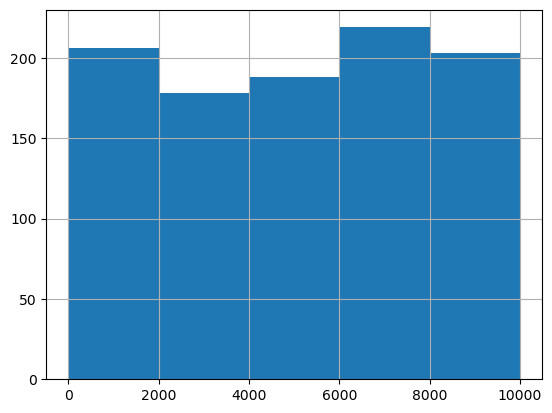

In [457]:
#histogram plot    (unit sold starting from 0 which ends upto 10k )
df["Units Sold"].hist(bins=5)
plt.show()

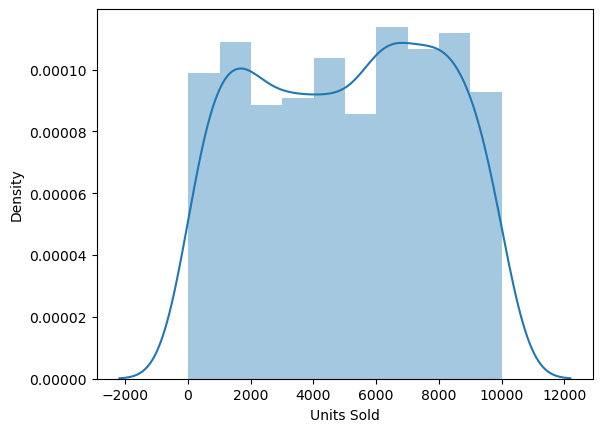

In [458]:
# Distribution Plot
sns.distplot(df["Units Sold"])  #(distribution ==> combination of both hist & line plot)
plt.show()

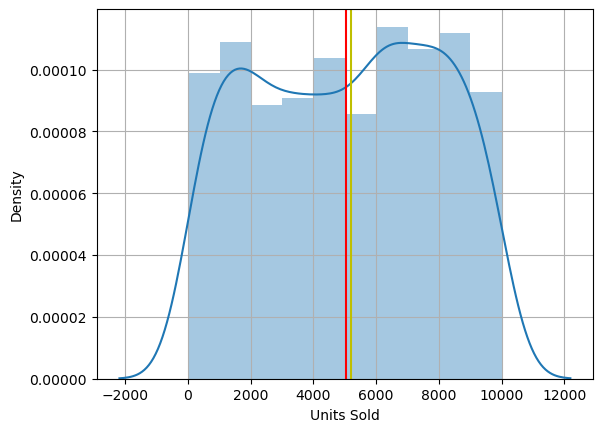

In [459]:
mprice=df["Units Sold"].mean()   #(ploting the mean & median in distplot for Unit Sold)
meprice=df["Units Sold"].median()
sns.distplot(df["Units Sold"])
plt.axvline(mprice,color='r')
plt.axvline(meprice,color='y')
plt.grid(True)
plt.show()

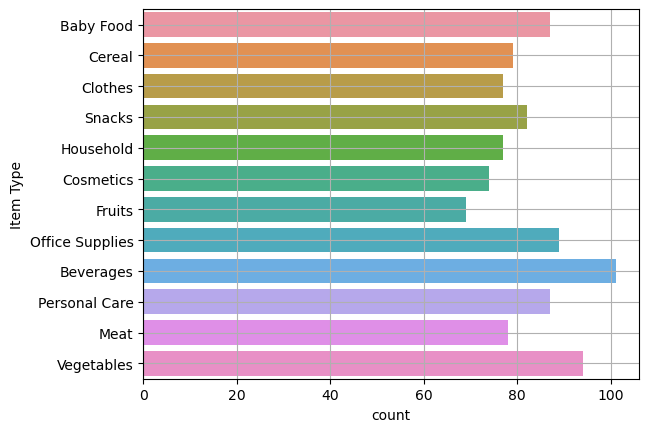

In [460]:
# count plot    #(by default only one columns is plotted)
sns.countplot(data=df,y="Item Type")
plt.grid(True)
plt.show()

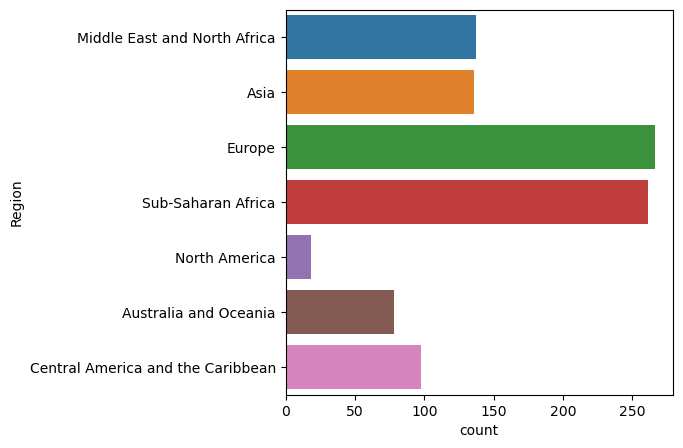

In [461]:
plt.figure(figsize=(5,5)) 
sns.countplot(data=df,y='Region')
plt.show()

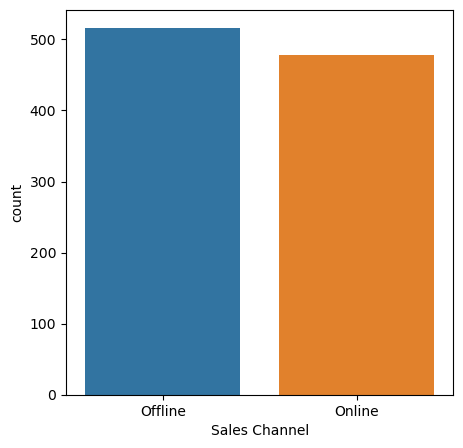

In [462]:
plt.figure(figsize=(5,5))
sns.countplot(df['Sales Channel'])
plt.show()

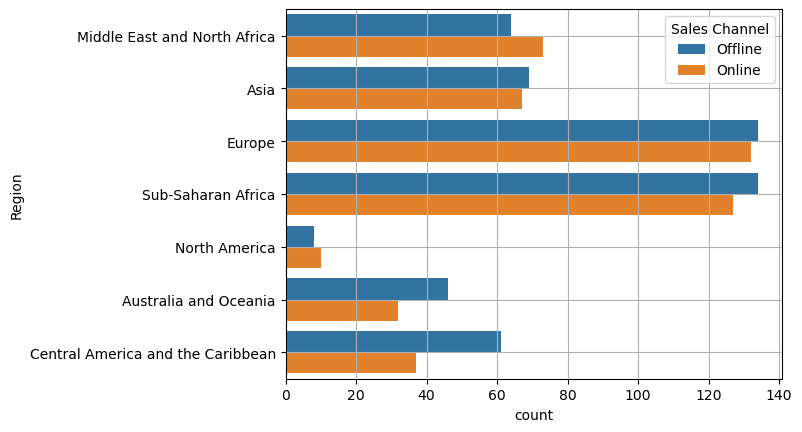

In [463]:
#count plot    #(by default only one columns is plotted) ('hue' parameter for plotting more tha one column ib single graph)
sns.countplot(data=df,y="Region",hue='Sales Channel')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Unit Cost')

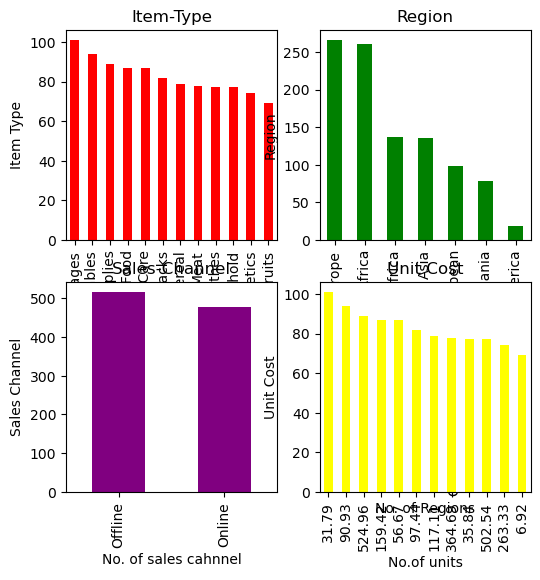

In [464]:
# dividing single figure into subplots
plt.figure(1)
plt.subplot(2,2,1)
df['Item Type'].value_counts().plot(figsize=(6,6),kind='bar',color='red')
plt.title("Item-Type")
plt.xlabel("No. of item_type")
plt.ylabel('Item Type')

plt.subplot(2,2,2)
df["Region"].value_counts().plot(figsize=(6,6),kind='bar',color='green')
plt.title("Region")
plt.xlabel("No. of Regions")
plt.ylabel('Region')

plt.subplot(2,2,3)
df["Sales Channel"].value_counts().plot(figsize=(6,6),kind='bar',color='purple')
plt.title("Sales-Channel")
plt.xlabel('No. of sales cahnnel')
plt.ylabel('Sales Channel')

plt.subplot(2,2,4)
df["Unit Cost"].value_counts().plot(figsize=(6,6),kind='bar',color='yellow')
plt.title("Unit Cost")
plt.xlabel('No.of units')
plt.ylabel('Unit Cost')

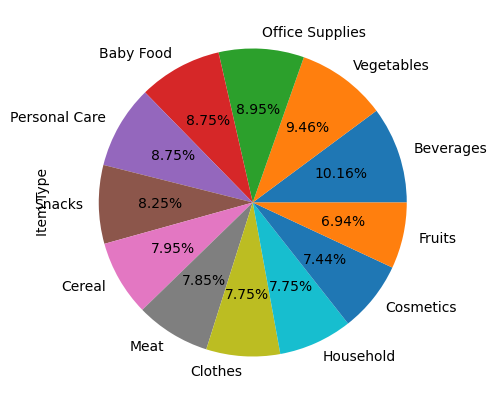

In [465]:
# Pie graph
df["Item Type"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%')
plt.show()

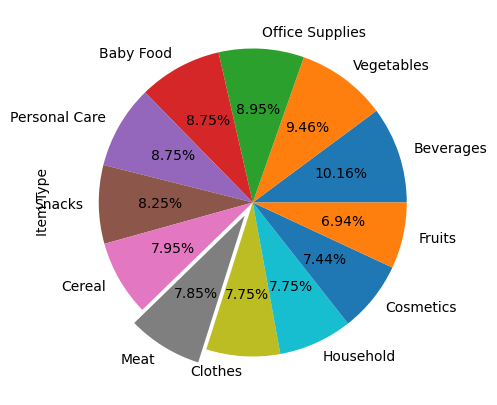

In [466]:
# explode Meat
explode=[0,0,0,0,0,0,0,0.1,0,0,0,0]
df["Item Type"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%',explode=explode)
plt.show()

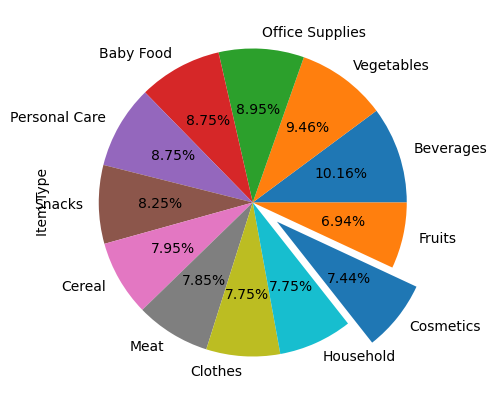

In [467]:
explode=[0,0,0,0,0,0,0,0,0,0,.2,0]
df["Item Type"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%',explode=explode)
plt.show()

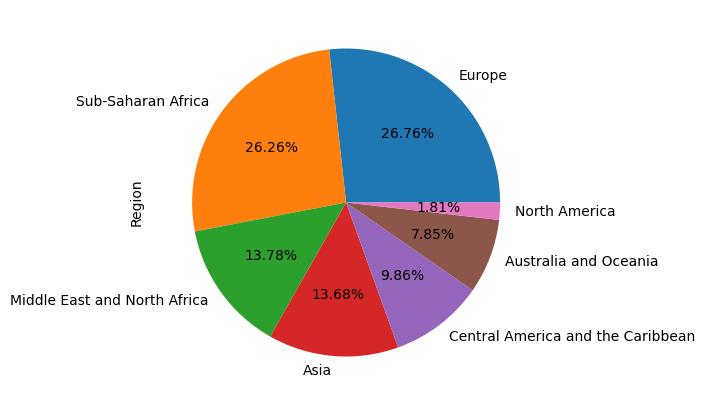

In [468]:
# Pie of Region
df["Region"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%')
plt.show()

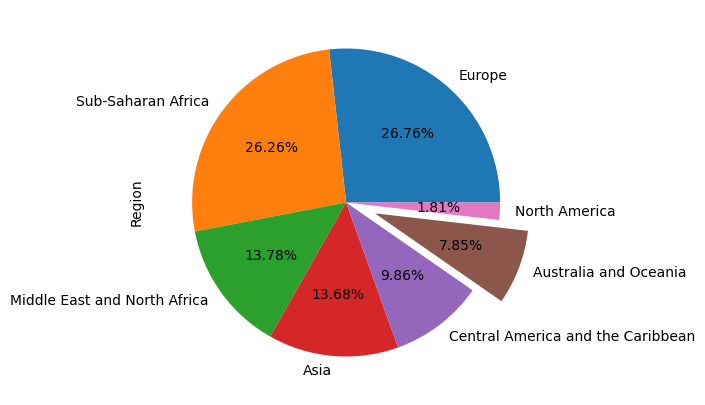

In [469]:
explode=[0,0,0,0,0,0.2,0]
df["Region"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%',explode=explode)
plt.show()

In [470]:
df.corr()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,0.007979,-0.036693,-0.039020,-0.025448,-0.029089,-0.010425
Units Sold,0.007979,1.000000,0.004925,0.003500,0.529434,0.481283,0.593668
Unit Price,-0.036693,0.004925,1.000000,0.986785,0.730178,0.744888,0.572126
Unit Cost,-0.039020,0.003500,0.986785,1.000000,0.717812,0.753258,0.498631
Total Revenue,-0.025448,0.529434,0.730178,0.717812,1.000000,0.987882,0.881645
Total Cost,-0.029089,0.481283,0.744888,0.753258,0.987882,1.000000,0.797716
Total Profit,-0.010425,0.593668,0.572126,0.498631,0.881645,0.797716,1.000000


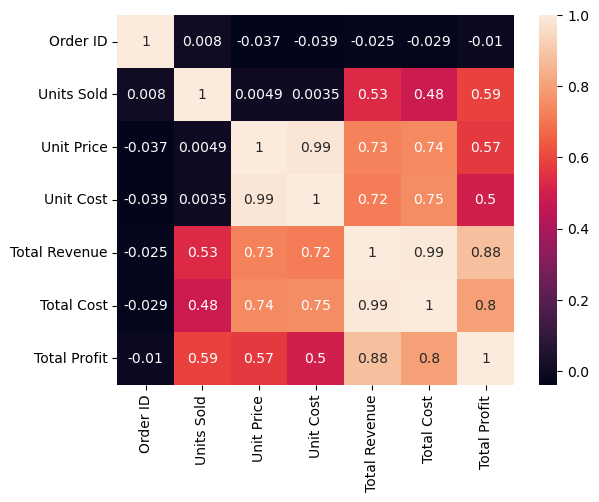

In [471]:
#The very dark are showing negative/weak relation
# the very light shade are showing strong/positive relation
# Bivariate Analysiscorr=df.corr()
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

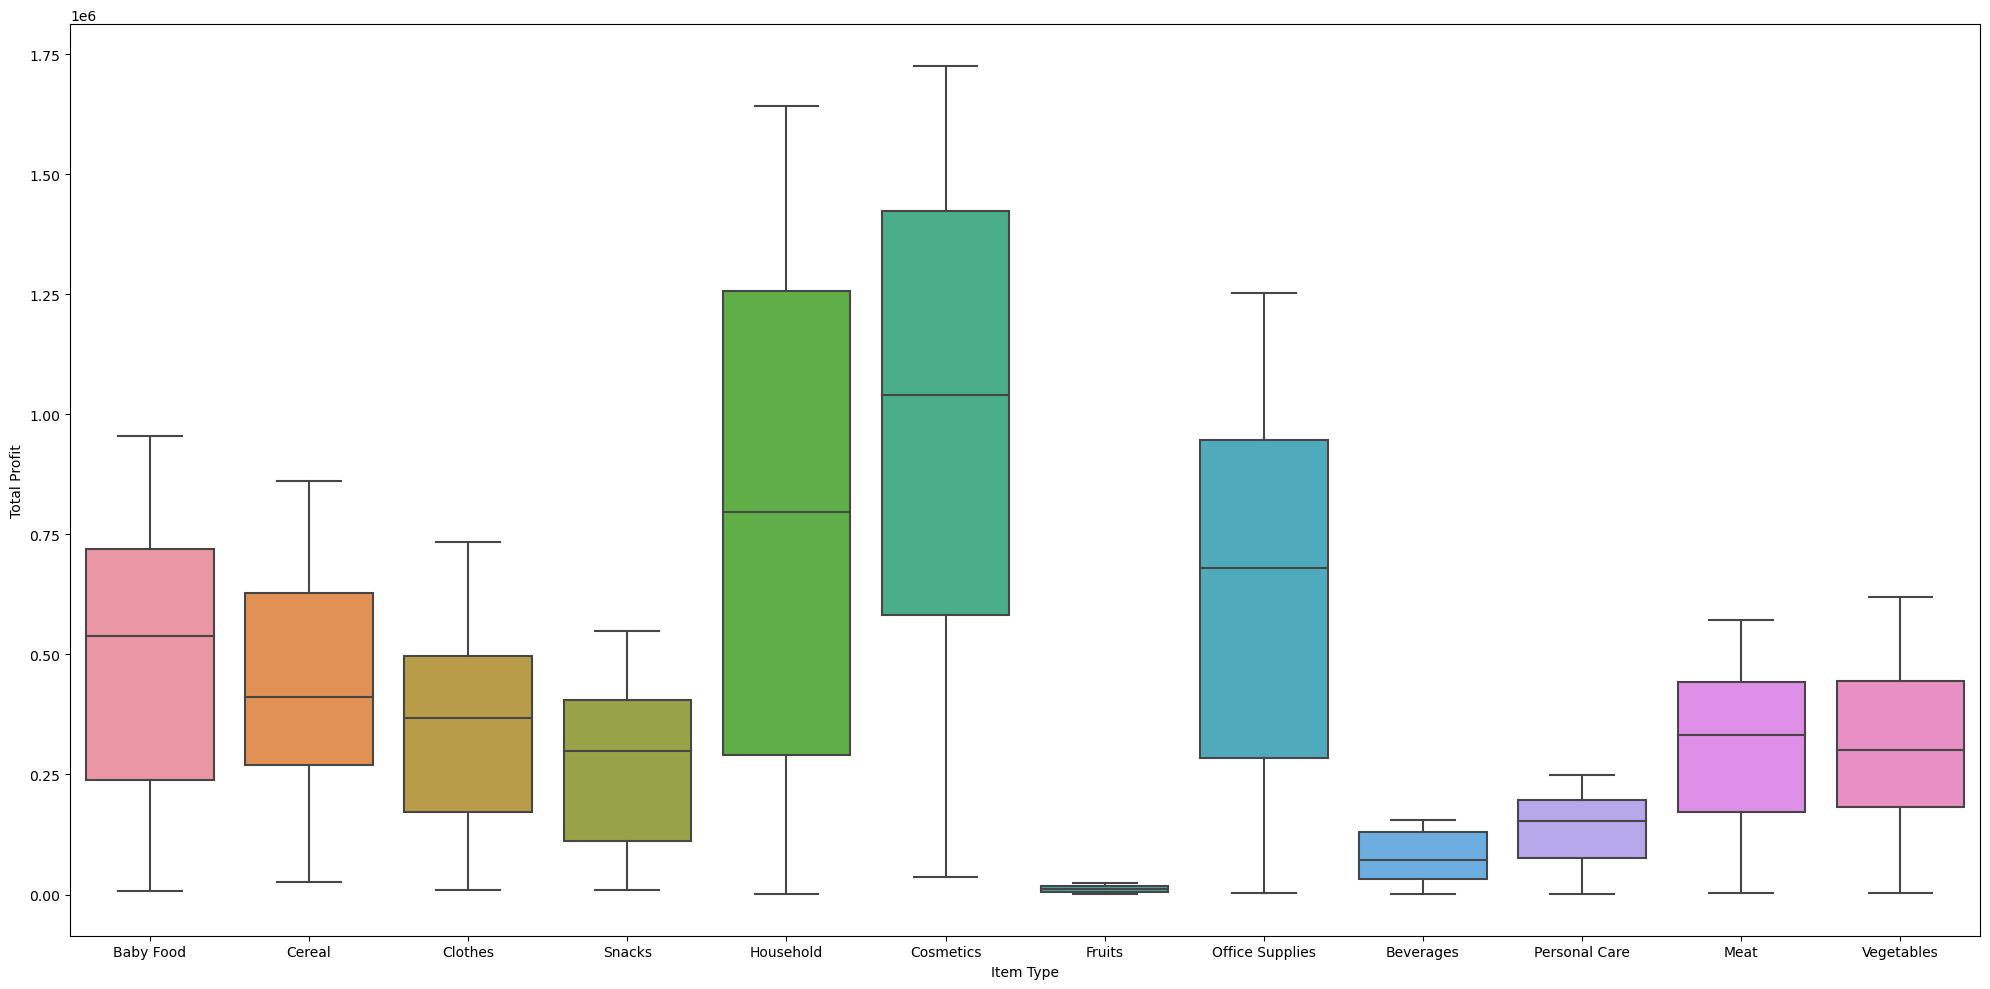

In [480]:
#BoxPlot
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Item Type',y="Total Profit")
plt.tight_layout()
plt.show()

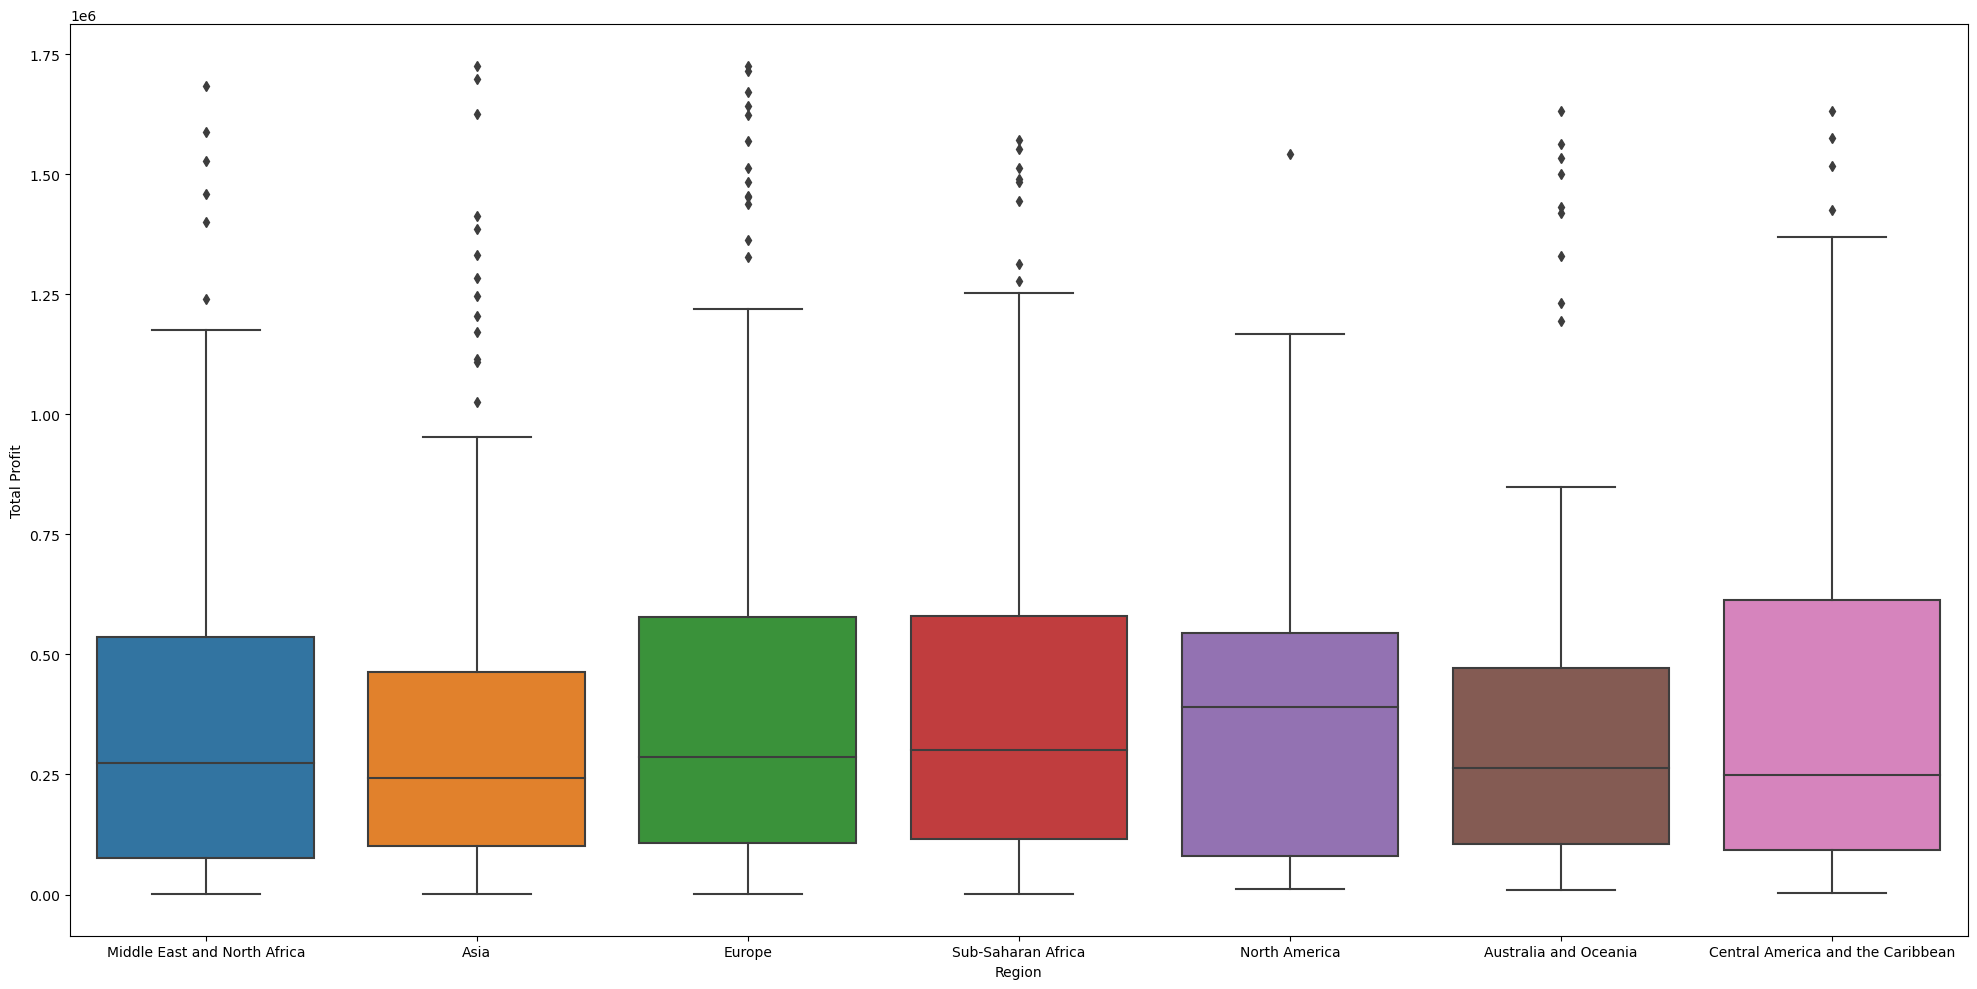

In [473]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Total Profit')
plt.tight_layout()
plt.show()

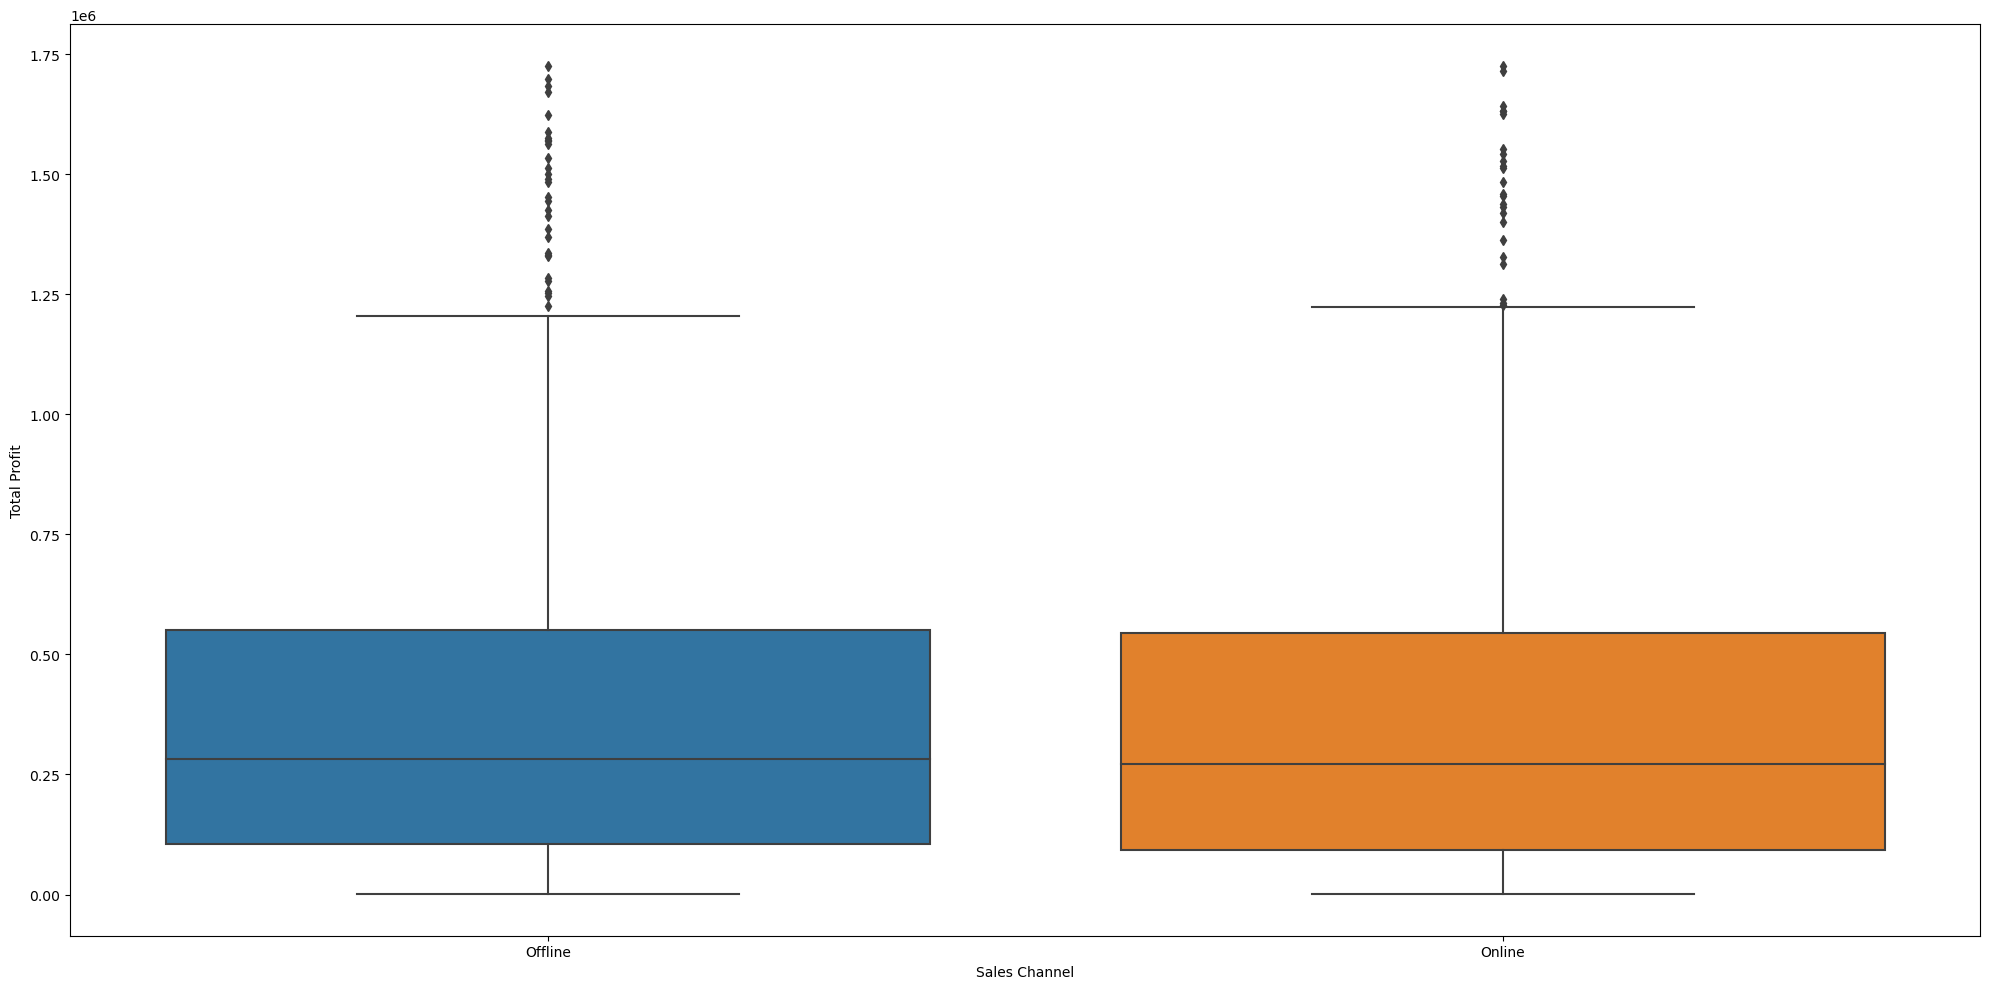

In [482]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Sales Channel',y='Total Profit')
plt.tight_layout()
plt.show()

In [ ]:
END